# Theoretical Bounds 2.0
# n inputs


In [1]:
import sys
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
import time
from multiprocessing import Pool
from itertools import repeat

sys.path.insert(1, "./utils/")
import HH
import Tree
import Tree_Validation as TV
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [2]:
data_dir = './theoretical_bounds_data/n_inputs2/results/'
data_dir_files = os.listdir(data_dir)

In [4]:
spiking_ratios = {
    'stim':{str(x):[] for x in range(2,21)},
    'spike':{str(x):[] for x in range(2,21)}
}
nst_stds = {
    'stim':{str(x):[] for x in range(2,21)},
    'spike':{str(x):[] for x in range(2,21)}
}

print("______PROGRESS______")
progress = 0.0
for i, file in enumerate(data_dir_files):
    num_stims = file.split('.')[2]
    first_event_type = file.split('.')[3]
    df = pd.read_csv(data_dir + file, index_col=0)
    spiking_ratios[first_event_type][num_stims].append(np.sum(~np.isnan(df['nst'])) / 10000)
    nst_stds[first_event_type][num_stims].append(np.std(~np.isnan(df['nst'])))
    if progress < i/len(data_dir_files):
        print('=',end='')
        progress+=0.05

______PROGRESS______

## Not including output spike events

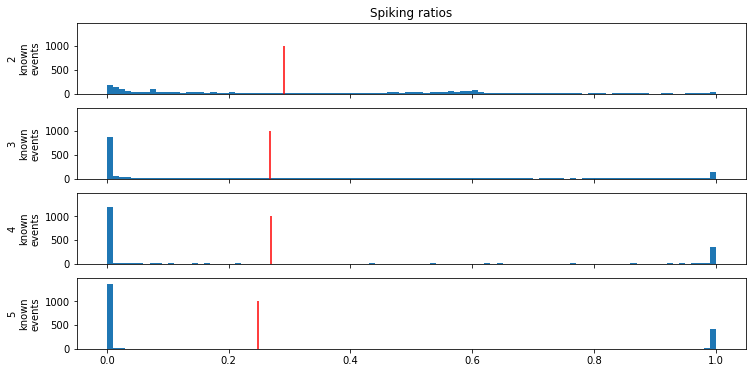

In [5]:
num_events = list(range(2,21))
fig, axes = plt.subplots(4,1, sharex=True, sharey=True, figsize=(12,6))

ymax = 0
axes[0].set_title('Spiking ratios')
hist = axes[0].hist(spiking_ratios['stim']['2'], bins=100)
ymax = max(max(hist[0]), ymax)
axes[0].vlines(np.mean(spiking_ratios['stim']['2']), 0,1000, color='red')
axes[0].set_ylabel('2\nknown\nevents')

hist = axes[1].hist(spiking_ratios['stim']['5'], bins=100)
ymax = max(max(hist[0]), ymax)
axes[1].vlines(np.mean(spiking_ratios['stim']['5']), 0,1000, color='red')
axes[1].set_ylabel('3\nknown\nevents')

hist = axes[2].hist(spiking_ratios['stim']['10'], bins=100)
ymax = max(max(hist[0]), ymax)
axes[2].vlines(np.mean(spiking_ratios['stim']['10']), 0,1000, color='red')
axes[2].set_ylabel('4\nknown\nevents')

hist = axes[3].hist(spiking_ratios['stim']['15'], bins=100)
ymax = max(max(hist[0]), ymax)
axes[3].vlines(np.mean(spiking_ratios['stim']['15']), 0,1000, color='red')
axes[3].set_ylabel('5\nknown\nevents',)
axes[3].set_ylim(0,ymax*1.1)
plt.show()

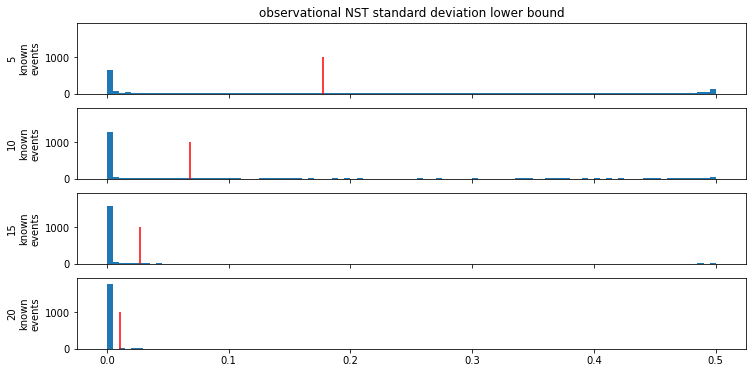

In [6]:
fig, axes = plt.subplots(4,1, sharex=True, sharey=True, figsize=(12,6))

ymax = 0
axes[0].set_title('observational NST standard deviation lower bound')
hist = axes[0].hist(nst_stds['stim']['5'], bins=100)
ymax = max(max(hist[0]), ymax)
axes[0].vlines(np.mean(nst_stds['stim']['5']), 0,1000, color='red')
axes[0].set_ylabel('5\nknown\nevents')

hist = axes[1].hist(nst_stds['stim']['10'], bins=100)
ymax = max(max(hist[0]), ymax)
axes[1].vlines(np.mean(nst_stds['stim']['10']), 0,1000, color='red')
axes[1].set_ylabel('10\nknown\nevents')

hist = axes[2].hist(nst_stds['stim']['15'], bins=100)
ymax = max(max(hist[0]), ymax)
axes[2].vlines(np.mean(nst_stds['stim']['15']), 0,1000, color='red')
axes[2].set_ylabel('15\nknown\nevents')

hist = axes[3].hist(nst_stds['stim']['20'], bins=100)
ymax = max(max(hist[0]), ymax)
axes[3].vlines(np.mean(nst_stds['stim']['20']), 0,1000, color='red')
axes[3].set_ylabel('20\nknown\nevents',)
axes[3].set_ylim(0,ymax*1.1)
plt.show()

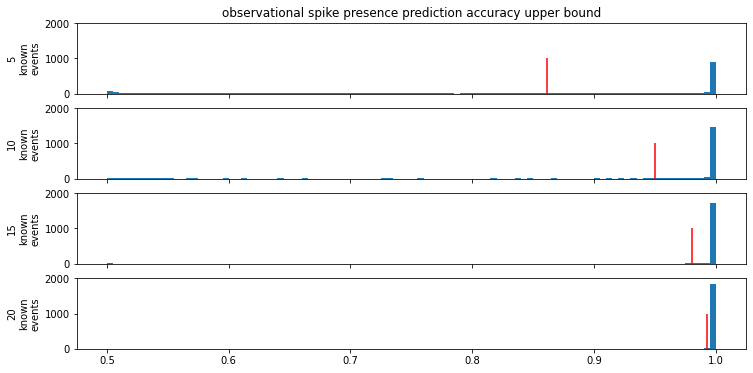

In [7]:
accuracies2 = [ratio**2 + (1-ratio)**2 for ratio in spiking_ratios['stim']['5']]
accuracies3 = [ratio**2 + (1-ratio)**2 for ratio in spiking_ratios['stim']['10']]
accuracies4 = [ratio**2 + (1-ratio)**2 for ratio in spiking_ratios['stim']['15']]
accuracies5 = [ratio**2 + (1-ratio)**2 for ratio in spiking_ratios['stim']['20']]

fig, axes = plt.subplots(4,1, sharex=True, sharey=True, figsize=(12,6))

ymax = 0
axes[0].set_title('observational spike presence prediction accuracy upper bound')
hist = axes[0].hist(accuracies2, bins=100)
ymax = max(max(hist[0]), ymax)
axes[0].vlines(np.mean(accuracies2), 0,1000, color='red')
axes[0].set_ylabel('5\nknown\nevents')

hist = axes[1].hist(accuracies3, bins=100)
ymax = max(max(hist[0]), ymax)
axes[1].vlines(np.mean(accuracies3), 0,1000, color='red')
axes[1].set_ylabel('10\nknown\nevents')

hist = axes[2].hist(accuracies4, bins=100)
ymax = max(max(hist[0]), ymax)
axes[2].vlines(np.mean(accuracies4), 0,1000, color='red')
axes[2].set_ylabel('15\nknown\nevents')

hist = axes[3].hist(accuracies5, bins=100)
ymax = max(max(hist[0]), ymax)
axes[3].vlines(np.mean(accuracies5), 0,1000, color='red')
axes[3].set_ylabel('20\nknown\nevents',)
axes[3].set_ylim(0,ymax*1.1)
plt.show()

In [8]:
accuracies = [np.mean([ratio**2 + (1-ratio)**2 for ratio in spiking_ratios['stim'][str(num_events)]]) for num_events in range(2,21)]
all_nst_stds = [np.mean(nst_stds['stim'][str(num_events)])for num_events in range(2,21)]

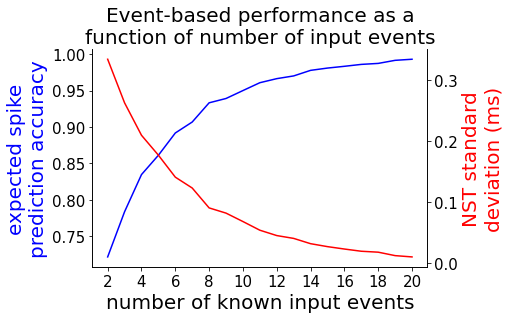

In [11]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2,21), accuracies,  color='blue')
ax2.plot(range(2,21), all_nst_stds,  color='red')
ax1.set_xticks(range(2,21,2))
ax1.set_xticklabels(range(2,21,2), fontsize=15)

ax1.set_xlabel('number of known input events', fontsize=20)
ax1.set_ylabel('expected spike\nprediction accuracy', color='blue', fontsize=20)
ax2.set_ylabel('NST standard\ndeviation (ms)', color='red', fontsize=20)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax1.set_title('Event-based performance as a\nfunction of number of input events', fontsize=20)

plt.show()